In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt

In [2]:
# 定义文件序号列表
sizes = [128, 256, 512, 1024, 2048, 4096]
snr_list = [-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# 初始化字典存储每个算法的准确度
accuracies = {alg: [] for alg in ['XGBoost', 'LightGBM', 'CatBoost', 'GBDT', 'RF', 'DT', 'SVM', 'Naive Bayes', 'KNN']}
# 定义每个算法的模型实例
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(verbose=0, force_row_wise=True),
    'CatBoost': cb.CatBoostClassifier(verbose=0),
    'GBDT': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(kernel="linear", decision_function_shape="ovo", max_iter=100000),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree', leaf_size=10, p=1, n_jobs=-1)
}
# 定义标识点
markers = {
    'XGBoost': 'o',  # 圆圈
    'LightGBM': 'D',  # 菱形
    'CatBoost': 's',  # 方块
    'GBDT': 'p',  # 五角星
    'RF': 'v',  # 下三角
    'DT': '*',
    'SVM': '>',  # 右三角
    'Naive Bayes': '<',  # 左三角
    'KNN': '^'  # 上三角
}
file_path_train = []
file_path_test  = []
# 循环遍历每个文件序号，并加载相应的 CSV 文件
for snr in snr_list:
    file_path_train.append(f'../preprocessed/combined_features_{snr}.csv')
    file_path_test.append(f'../preprocessed/combined_features_{snr}_test.csv')

In [3]:
# 初始化字典存储X_train和y_train数据集
X_trains = {}
y_trains = {}
X_tests = {}
y_tests = {}
# 循环处理每个文件
for snr, file_path in zip(snr_list, file_path_train):
    # 读取数据集
    df = pd.read_csv(file_path)
    # 打乱数据集
    df = shuffle(df, random_state=42)
    # 分离标签和特征
    y_trains[snr] = df['label']
    X_trains[snr] = df.drop('label', axis=1)
for snr, file_path in zip(snr_list, file_path_test):
    # 读取数据集
    df = pd.read_csv(file_path)
    # 打乱数据集
    df = shuffle(df, random_state=42)
    # 分离标签和特征
    y_tests[snr] = df['label']
    X_tests[snr] = df.drop('label', axis=1)

In [4]:
# 训练模型并评估准确度
for snr in snr_list:
    X_train = X_trains[snr]
    X_test  = X_tests [snr]
    y_train = y_trains[snr]
    y_test  = y_tests [snr]
    # print(f"Results for data snr {snr}:")
    for alg, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[alg].append(accuracy)
        # print(f"{alg}: Accuracy = {accuracy:.4f}")
# accuracies.sort()


d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Con

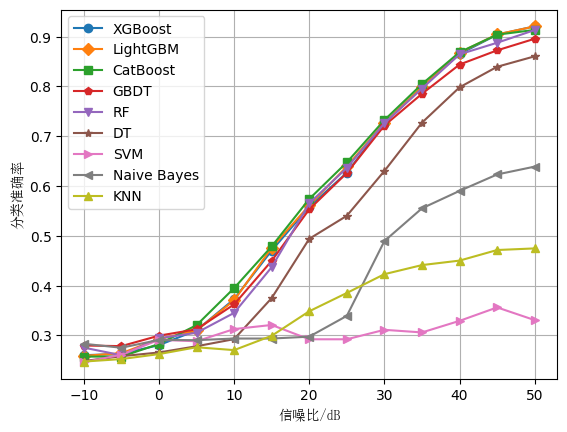

In [5]:
# 绘制不同算法在不同数据集大小上的准确率
for alg, acc_list in accuracies.items():
    plt.plot(snr_list, acc_list, label=alg, marker=markers[alg])
plt.xlabel('信噪比/dB', fontproperties="SimSun")
plt.ylabel('分类准确率', fontproperties="SimSun")
plt.legend()
plt.grid(True)
plt.savefig('snr.png',dpi=600, bbox_inches='tight')
plt.show()

In [6]:
# # 打印结果
# for size in sorted(results):
#     print(f"\nResults for data size {size}:")
#     for alg in sorted(results[size]):
#         print(f"  {alg}: Accuracy = {results[size][alg]:.4f}")

for alg, acc in accuracies.items():
    print(alg, str(acc))

XGBoost [0.26025, 0.263, 0.2805, 0.31025, 0.37275, 0.4705, 0.55825, 0.62675, 0.7255, 0.799, 0.865, 0.904, 0.92075]
LightGBM [0.259, 0.26425, 0.29275, 0.31, 0.3705, 0.476, 0.561, 0.63925, 0.72725, 0.7985, 0.86775, 0.9045, 0.9205]
CatBoost [0.2575, 0.2575, 0.28275, 0.3205, 0.395, 0.47875, 0.574, 0.6475, 0.7325, 0.80475, 0.86875, 0.904, 0.9135]
GBDT [0.27975, 0.2785, 0.2995, 0.31225, 0.36225, 0.44975, 0.55325, 0.62625, 0.7215, 0.78525, 0.844, 0.8725, 0.89575]
RF [0.2755, 0.26025, 0.29425, 0.30525, 0.34525, 0.437, 0.56525, 0.6365, 0.726, 0.79575, 0.8645, 0.88775, 0.91325]
DT [0.2485, 0.25825, 0.26575, 0.27825, 0.2925, 0.375, 0.494, 0.54025, 0.63025, 0.72725, 0.79825, 0.8395, 0.8605]
SVM [0.246, 0.26125, 0.29125, 0.28825, 0.31275, 0.321, 0.29225, 0.29225, 0.31125, 0.306, 0.32925, 0.35625, 0.33075]
Naive Bayes [0.28325, 0.27525, 0.291, 0.2905, 0.29375, 0.29375, 0.2975, 0.33925, 0.4895, 0.55525, 0.59025, 0.62325, 0.639]
KNN [0.2475, 0.2525, 0.2625, 0.27625, 0.2705, 0.29925, 0.3485, 0.38525, 0

In [7]:
acc = {alg: [] for alg in ['XGBoost', 'LightGBM', 'CatBoost', 'GBDT', 'RF', 'DT', 'SVM', 'Naive Bayes', 'KNN']}
acc['XGBoost']=[0.27225, 0.2855, 0.273, 0.308, 0.374, 0.475, 0.5795, 0.65425, 0.72, 0.8, 0.86, 0.9045, 0.92675]
acc['LightGBM']=[0.27925, 0.27625, 0.2955, 0.323, 0.37825, 0.4795, 0.57475, 0.65975, 0.72425, 0.8025, 0.8615, 0.905, 0.922]
acc['CatBoost']=[0.2655, 0.27675, 0.28425, 0.3215, 0.39575, 0.48225, 0.5875, 0.664, 0.7305, 0.80125, 0.86675, 0.907, 0.919]
acc['GBDT']=[0.271, 0.2895, 0.3025, 0.31525, 0.36375, 0.45875, 0.56525, 0.64325, 0.7025, 0.78625, 0.83975, 0.87875, 0.90025]
acc['RF']=[0.271, 0.27475, 0.27675, 0.31125, 0.35975, 0.46675, 0.56075, 0.655, 0.722, 0.80075, 0.86325, 0.9025, 0.92075]
acc['DT']=[0.25775, 0.25775, 0.25475, 0.28075, 0.2895, 0.39625, 0.5055, 0.55575, 0.6425, 0.72925, 0.7925, 0.8435, 0.8705]
acc['SVM']=[0.256, 0.268, 0.2965, 0.29725, 0.28875, 0.3165, 0.3015, 0.33275, 0.2925, 0.32075, 0.32375, 0.3185, 0.361]
acc['Naive Bayes']=[0.27775, 0.29675, 0.2955, 0.29275, 0.29925, 0.30775, 0.30425, 0.333, 0.48175, 0.55475, 0.57025, 0.617, 0.625]
acc['KNN']=[0.24375, 0.259, 0.25625, 0.273, 0.28375, 0.306, 0.354, 0.39875, 0.44775, 0.481, 0.5045, 0.5155, 0.52775]

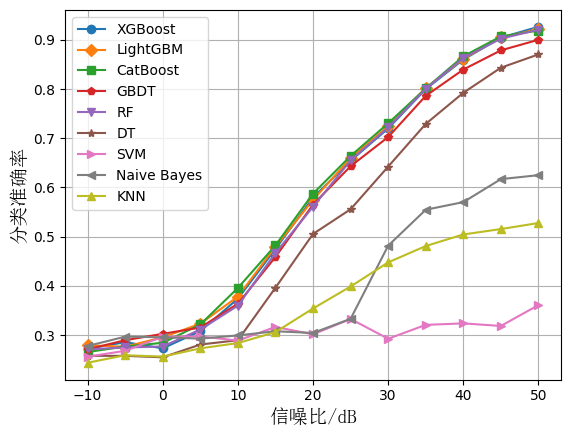

In [9]:
# 绘制不同算法在不同数据集大小上的准确率
for alg, acc_list in acc.items():
    plt.plot(snr_list, acc_list, label=alg, marker=markers[alg])
plt.xlabel('信噪比/dB', fontproperties="SimSun",size=14)
plt.ylabel('分类准确率', fontproperties="SimSun",size=14)
plt.legend()
plt.grid(True)
plt.savefig('./imgs/snr_new.png',dpi=600, bbox_inches='tight')
plt.show()